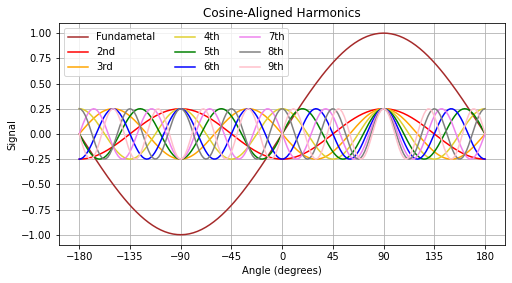

In [1]:
# Copyright 2022, Donald Tillman.  All rights reserved.
# Generate plots for the device distortion article.

from distortion import *
from numpy import array, cos, linspace, pi, sin
import matplotlib.pyplot as plt
import os

# First a couple of Cosine-Aligned Harmonics demos

x = linspace(-180, +180, 200)
ords = ['Fundametal', '2nd', '3rd'] + [f'{i}th' for i in range(4,10)]
def harmonics():
    fig, axs = plt.subplots(1, 1, figsize=(8, 4), dpi=72)
    axs.set_title('Cosine-Aligned Harmonics')
    axs.set_xlabel('Angle (degrees)')
    axs.set_xticks(linspace(-180, 180, 9, endpoint=True))
    axs.set_ylabel('Signal')
    axs.grid()
    plt.plot(x, sin(x * pi / 180), color=colors[1])
    return fig, axs

fig, axs = harmonics()
for n in range(2, 10):
    plt.plot(x, 0.25 * cos(n * (x - 90) * pi / 180), color=colors[n])
axs.legend(ords, ncols=3)

plt.savefig(os.path.join(imgdir, 'cosine-aligned'))

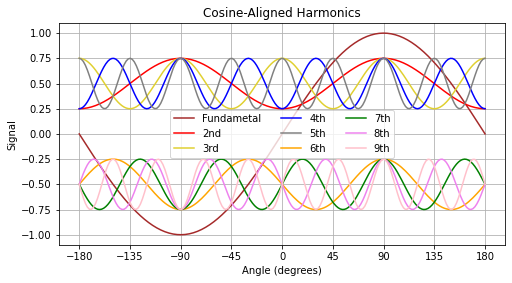

In [2]:
fig, axs = harmonics()
for n in range(2, 10, 2):
    plt.plot(x, .5 + 0.25 * cos(n * (x - 90) * pi / 180), color=colors[n])
for n in range(3, 10, 2):
    plt.plot(x, -.5 + 0.25 * cos(n * (x - 90) * pi / 180), color=colors[n])
axs.legend(ords, ncols=3)

plt.savefig(os.path.join(imgdir, 'cosine-aligned-even-odd'))

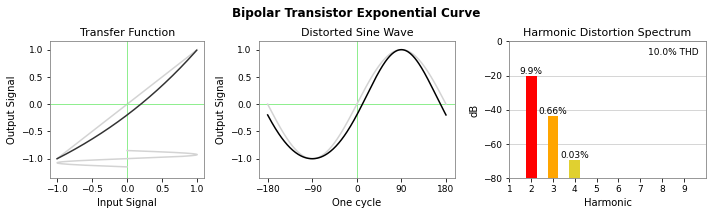

In [3]:
triptych(tf_exponential, 'Bipolar Transistor Exponential Curve', 'triptych-exp')

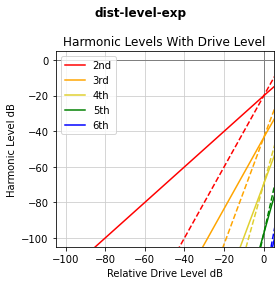

In [4]:
plot_harmonics_level(tf_exponential, 'Bipolar Transistor Exponential Curve', 'dist-level-exp')

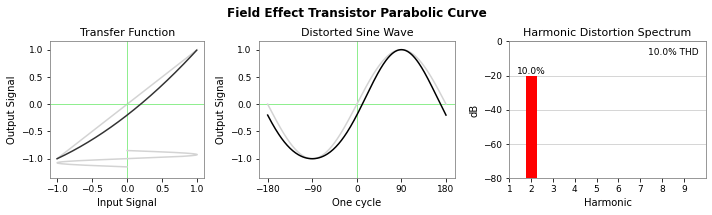

In [5]:
triptych(tf_parabolic, 'Field Effect Transistor Parabolic Curve', 'triptych-fet-parabolic')

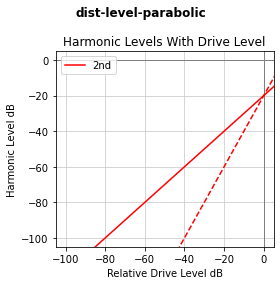

In [6]:
plot_harmonics_level(tf_parabolic, 'Field Effect Transistor Parabolic Curve','dist-level-parabolic')

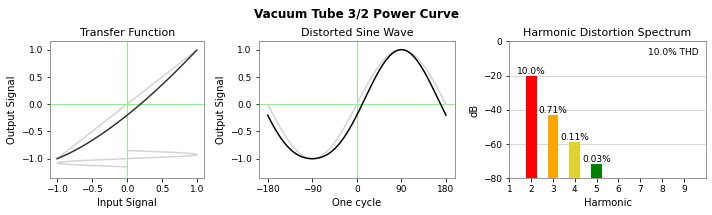

In [7]:
triptych(lambda x: (x + 1.33) ** 1.5, 'Vacuum Tube 3/2 Power Curve', 'triptych-x32')

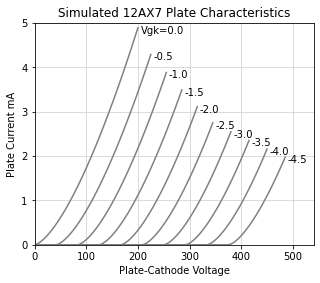

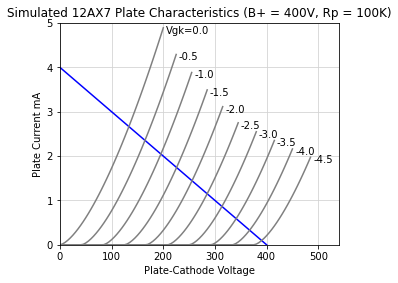

In [8]:
from numpy import array, linspace, prod

def tubecurves(loadline=False, vb=400, rp=100e+3, p=1, title='Title', filename=None):
    fig, axs = plt.subplots(1, 1, figsize=(5, 4), 
                            dpi=72,
                            facecolor='none')
    axs.set_xlim((0, 540))
    axs.set_ylim((0, 5))
    axs.set_xlabel('Plate-Cathode Voltage')
    axs.set_ylabel('Plate Current mA')
    axs.set_title(title)
    axs.grid(color='lightgray')

    vps = linspace(0, 500, 101)
    if loadline:
        axs.plot((vb,0), (0, 1000 * vb / rp), 'blue')
    for g in linspace(0, -4.5, 10):
        curve = tube(g, vps)
        # reshape to vi pairs
        cpairs = array([vps, curve]).T
        # tube power limit
        plim = cpairs[prod(cpairs, axis=1) < p]
        # scale to mA, reshape for plot
        points = (plim * [1, 1000]).T
        axs.plot(*points, 'gray')
        axs.annotate(g if g else f'Vgk={g}', points[:, -1] + [5,-.13])
    if filename:
        plt.savefig(os.path.join(imgdir, filename))
        
tubecurves(title='Simulated 12AX7 Plate Characteristics', 
           filename='platecurves')

tubecurves(loadline=True, 
           title='Simulated 12AX7 Plate Characteristics (B+ = 400V, Rp = 100K)',
           filename='platecurvesll')

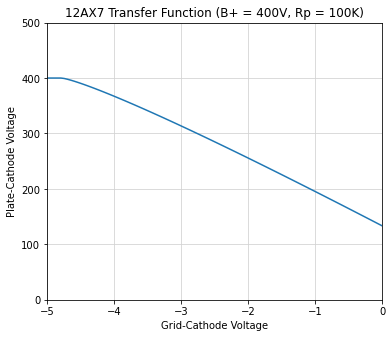

In [9]:

def tubetransfer(loadline=False, vb=400, rp=100e+3, title='Title', filename=None):
    fig, axs = plt.subplots(1, 1, figsize=(6, 5), 
                            dpi=72,
                            facecolor='none')
    axs.set_xlim((-5, 0))
    axs.set_ylim((0, 500))
    axs.set_xlabel('Grid-Cathode Voltage')
    axs.set_ylabel('Plate-Cathode Voltage')
    axs.set_title(title)
    axs.grid(color='lightgray')
    ins = linspace(0, -5, 100)
    axs.plot(ins, tubecircuit(ins, vb=vb, rp=rp))
    if filename:
        fig.savefig(os.path.join(imgdir, filename))
    
tubetransfer(title='12AX7 Transfer Function (B+ = 400V, Rp = 100K)', filename='12ax7tf')

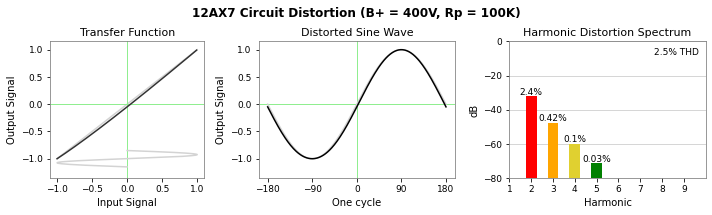

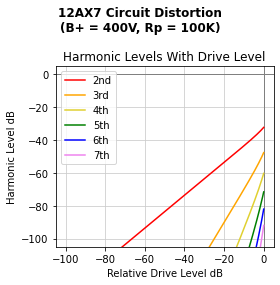

In [10]:
triptych(tf_tube, '12AX7 Circuit Distortion (B+ = 400V, Rp = 100K)', 'triptych12ax7')

plot_harmonics_level(tf_tube,
                     level_max=0,
                     title='12AX7 Circuit Distortion\n(B+ = 400V, Rp = 100K)', 
                     filename='dist-level-12ax7')

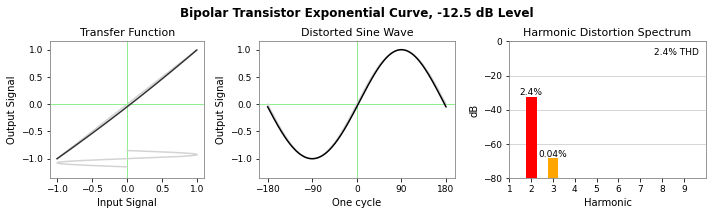

In [11]:
triptych(lambda x: tf_exponential(x, .4 * fromdb(-12.5)), 
         'Bipolar Transistor Exponential Curve, -12.5 dB Level', 'triptych-exp-low')